## AirBnb Listings Analysis

### Objective 1: Basic Prep & QA

* Read in the AirBNB listings Data (use low_memory=False and encoding="ISO-8859-1 in read_csv)
* Cast any date columns as a datetime format.
* Filter down the data to just listings in the city of Paris.
* Explore the Paris data, check for missing values, and make sure any datetime columns are stored properly
* Finally, calculate the minimum, maximum and count for each numeric field for listings in Paris

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

listings = pd.read_csv(
    "Listings.csv", 
    encoding = "ISO-8859-1", 
    parse_dates=["host_since"], 
    low_memory=False
)

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [2]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [3]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


### Objective 2: Prepare for Visualization

* Create a DataFrame called `paris_listings_neighbourhood`. Group the Paris listings by `neighbourhood` and calculate the average price for each. Sort by price in ascending order.

* Create a DataFrame called `paris_listings_accomodations`. Filter your data down to the most expensive neighbourhood in Paris. Group it by `accomodates` and calculate the average price for each. Sort by price in ascending order.

* Finally, create a DataFrame called `paris_listings_over_time`. Group the data by the year component of `host_since`. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.

In [4]:
paris_listings_neighbourhood = (
    paris_listings.groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [5]:
paris_listings_accomodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [6]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
     })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


### Objective 3: Visualize the Data

* Build a horizontal bar chart of average rent price by neighborhood. Which neighbourhoods stand out?
* Build a horizontal bar chart of average price by accomodates in the most expensive neighbourhood. Are the results intuitive?
* Finally, build line charts of new hosts per year and average price by year. What happened to new hosts in 2015? Was average price impacted? 
* Challenge: Plot both time series in a dual axis line chart!

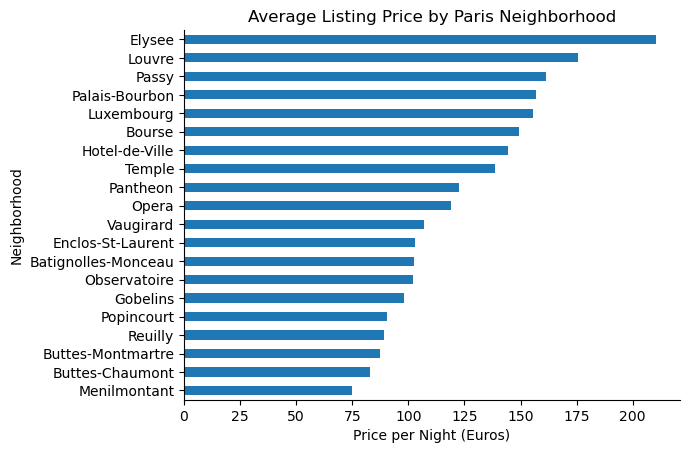

In [7]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighborhood",
     xlabel="Price per Night (Euros)",
     ylabel="Neighborhood",
     legend=None
 )
)

sns.despine()

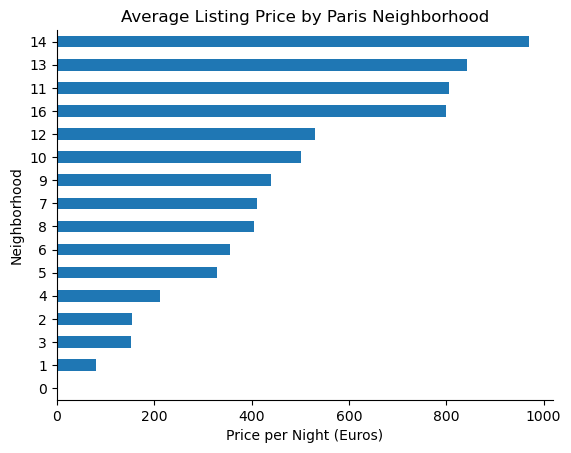

In [8]:
(paris_listings_accomodations
 .plot
 .barh(
     title="Average Listing Price by Paris Neighborhood",
     xlabel="Price per Night (Euros)",
     ylabel="Neighborhood",
     legend=None
 )
)

sns.despine()

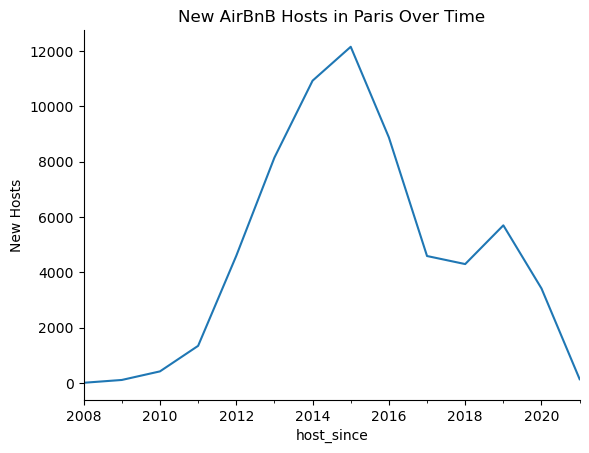

In [9]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnB Hosts in Paris Over Time"
)

sns.despine()

<Axes: xlabel='host_since'>

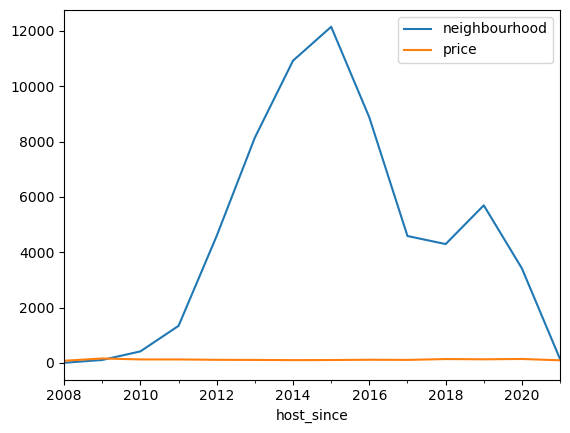

In [10]:
paris_listings_over_time.plot()

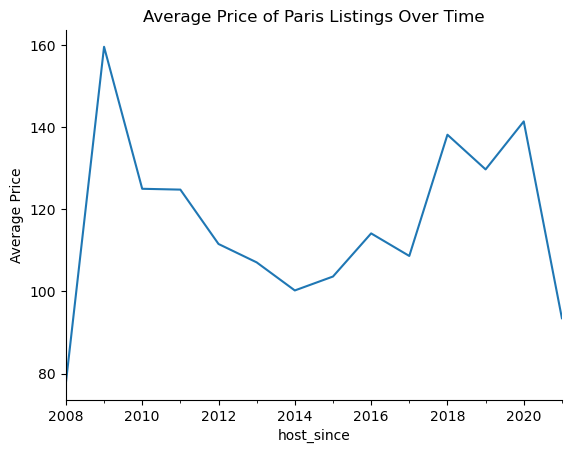

In [11]:
(paris_listings_over_time["price"]
 .plot(
    ylabel="Average Price",
    title="Average Price of Paris Listings Over Time"
 )
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

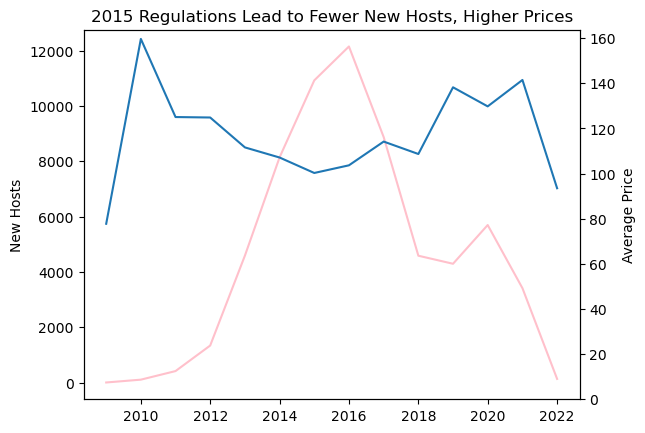

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)
ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")